## Making Plots for Henderson-Rosenthal Analysis

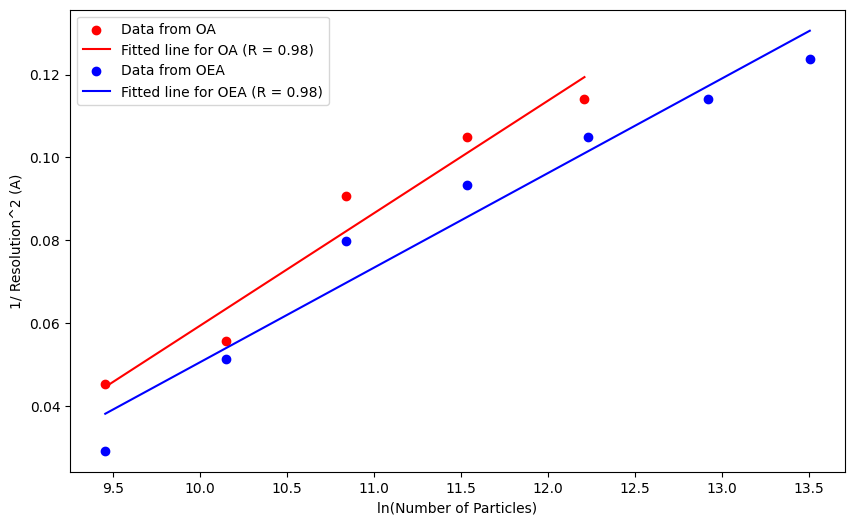

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The x-value for the intercept is: 7.961067926566345


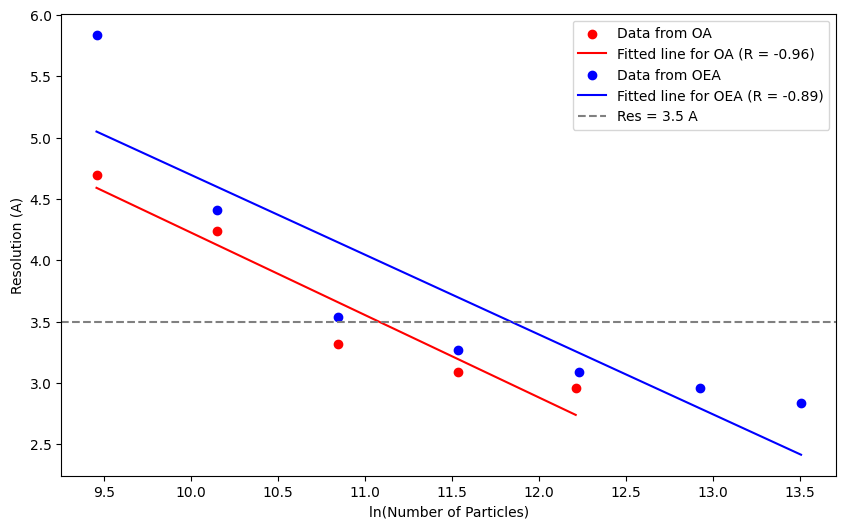

The ln(particles) for the intercept at 3.5 A is 11.08054534078559, corresponding to 64896 particles
The ln(particles) for the intercept at 3.5 A is 11.839142778459227, corresponding to 138571 particles
----------------------------------------------------------------------------------------------------------------------------------
The ln(particles) for the intercept at 3.6 A is 10.931813648942635, corresponding to 55927 particles
The ln(particles) for the intercept at 3.6 A is 11.685487644030635, corresponding to 118834 particles


In [ ]:
"""
Program to read data from the output of bfactor.py (RELION) and plot the results
This one was to compare two datasets, OA and OEA for the GPR3 protein
The data files should be in the format and written as unix text files.

NrParticles Ln(NrParticles) Resolution(A) 1/Resolution^2 PostProcessBfactor
        100           4.605         27.00         0.0014              -0.00
        200           5.298         15.43         0.0042              -0.00
        400           5.991         10.80         0.0086             416.69
        800           6.685         15.43         0.0042            7697.93
       1600           7.378         16.62         0.0036             477.69
       3200           8.071         10.29         0.0095             686.40
       6400           8.764          8.64         0.0134              98.36
      12800           9.457          4.70         0.0454              95.31
      25600          10.150          4.24         0.0557              84.41
      51200          10.843          3.32         0.0906              62.11
     102400          11.537          3.09         0.1050              62.53
     200953          12.211          2.96         0.1142              55.62

"""

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Function to read data from a file
def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        header = next(file) if filename.endswith('.txt') else None  # Skip the header if present
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:  # Ensure there are exactly 5 columns
                nr_particles = int(parts[0])
                ln_nr_particles = float(parts[1])
                resolution = float(parts[2])
                inv_resolution_squared = float(parts[3])
                bfactor = float(parts[4])
                data.append((ln_nr_particles, resolution, nr_particles, inv_resolution_squared, bfactor))
    return [(d[0], d[1], d[2], d[3], d[4]) for d in data]  # Return as a list of tuples

# Read data from both files
data1 = read_data('./data/OA_linear.txt')
data2 = read_data('./data/OEA_linear.txt')

# Extract the relevant columns from each dataset
ln_nr_particles1 = [d[0] for d in data1]
resolution1 = [d[1] for d in data1]
inv_res_sq1 = [d[3] for d in data1]
bfact1 = [d[4] for d in data1]
ln_nr_particles2 = [d[0] for d in data2]
resolution2 = [d[1] for d in data2]
inv_res_sq2 = [d[3] for d in data2]
bfact2 = [d[4] for d in data2]

# Perform linear regression on each dataset
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(ln_nr_particles1, inv_res_sq1)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(ln_nr_particles2, inv_res_sq2)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(ln_nr_particles1, resolution1)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(ln_nr_particles2, resolution2)

# Create a fitted line for each dataset
fitted_values1 = slope1 * np.array(ln_nr_particles1) + intercept1
fitted_values2 = slope2 * np.array(ln_nr_particles2) + intercept2
fitted_values3 = slope3 * np.array(ln_nr_particles1) + intercept3
fitted_values4 = slope4 * np.array(ln_nr_particles2) + intercept4

# Plot the ln(ptcles vs 1/res^2 for both datasets)
plt.figure(figsize=(10, 6))
plt.scatter(ln_nr_particles1, inv_res_sq1, label='Data from OA', color='red')
plt.plot(ln_nr_particles1, fitted_values1, color='red', label=f'Fitted line for OA (R = {r_value1:.2f})')
plt.scatter(ln_nr_particles2, inv_res_sq2, color='blue', label='Data from OEA')
plt.plot(ln_nr_particles2, fitted_values2, color='blue', label=f'Fitted line for OEA (R = {r_value2:.2f})')
plt.xlabel('ln(Number of Particles)')
plt.ylabel('1/ Resolution^2 (A)')
plt.legend()
plt.show()

# Finding the intercept x-value and printing it
intercept_x = (intercept2 - intercept1) / (slope1 - slope2)
print("The x-value for the intercept is:", intercept_x)


# Plot the ln(ptcles vs resoltion for both datasets)
plt.figure(figsize=(10, 6))
plt.scatter(ln_nr_particles1, resolution1, label='Data from OA', color='red')
plt.plot(ln_nr_particles1, fitted_values3, color='red', label=f'Fitted line for OA (R = {r_value3:.2f})')
plt.scatter(ln_nr_particles2, resolution2, color='blue', label='Data from OEA')
plt.plot(ln_nr_particles2, fitted_values4, color='blue', label=f'Fitted line for OEA (R = {r_value4:.2f})')
plt.axhline(y=3.5, linestyle='--', color='gray', label='Res = 3.5 A')
plt.xlabel('ln(Number of Particles)')
plt.ylabel('Resolution (A)')
plt.legend()
plt.savefig('ln_ptcles_vs_resolution.eps', dpi=300)  # Save in EPS format
plt.savefig('ln_ptcles_vs_resolution.png', dpi=300)  # Save in PNG format
plt.show()


# Print the value where the fitted lines cross Y=3.5
OA_value = (3.5 - intercept3) / slope3
OEA_value = (3.5 - intercept4) / slope4


print("The ln(particles) for the intercept at 3.5 A is {}, corresponding to {} particles".format(OA_value,int(np.exp(OA_value))))
print("The ln(particles) for the intercept at 3.5 A is {}, corresponding to {} particles".format(OEA_value,int(np.exp(OEA_value))))
print("----------------------------------------------------------------------------------------------------------------------------------")

interceptVALUE = float(input("What Resolution to you want to see the particle count for?"))
OA_value = (interceptVALUE - intercept3) / slope3
OEA_value = (interceptVALUE - intercept4) / slope4
print("The ln(particles) for the intercept at {} A is {}, corresponding to {} particles".format(interceptVALUE,OA_value,int(np.exp(OA_value))))
print("The ln(particles) for the intercept at {} A is {}, corresponding to {} particles".format(interceptVALUE,OEA_value,int(np.exp(OEA_value))))